<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Lab%205%20-%20Bayesian%20and%20Causal%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem Bayesiana

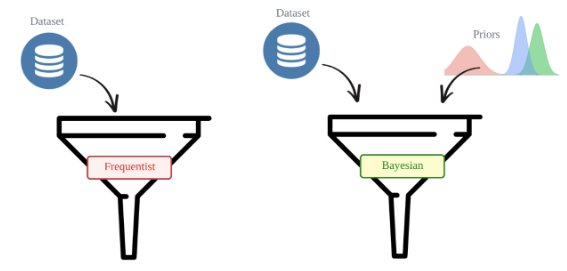


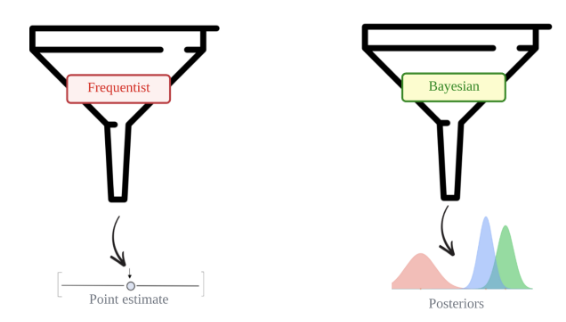


### Relembrando as Equações


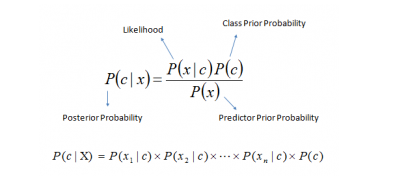

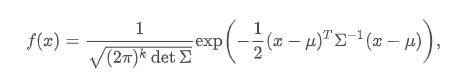


## Exemplo 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')

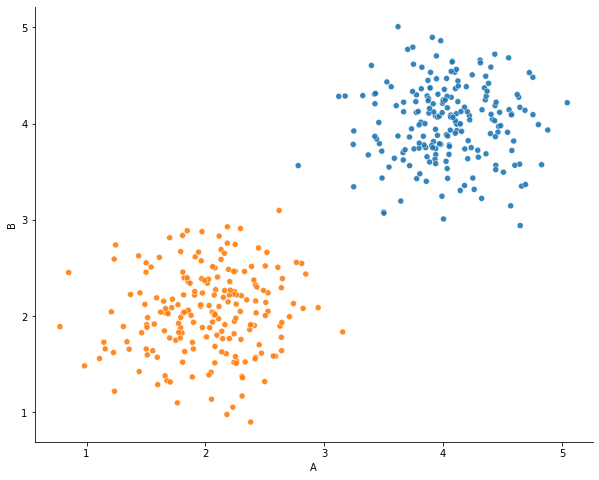

In [ ]:
num_examples = 200
classe1 = np.column_stack((np.random.normal(2, 0.4, num_examples), np.random.normal(2, 0.4, num_examples)))
classe2 = np.random.normal(4, 0.4, num_examples * 2).reshape(num_examples, 2)
X = np.row_stack((classe1, classe2))
y = np.array([1] * num_examples + [0] * num_examples)

X = pd.DataFrame(X, index = range(len(X)), columns = ['A', 'B'])
X['resultado'] = y

fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X['A'], X['B'], hue = y, legend= None, alpha = 0.9)
sns.despine()

In [ ]:
X.head()

,A,B,resultado
0,1.783706,1.843817,1
1,1.657333,1.342225,1
2,2.451321,1.847681,1
3,1.370685,2.441086,1
4,2.242598,2.031779,1


In [ ]:
prior_1 = len(classe1) / len(X)
prior_2 = len(classe2) / len(X)


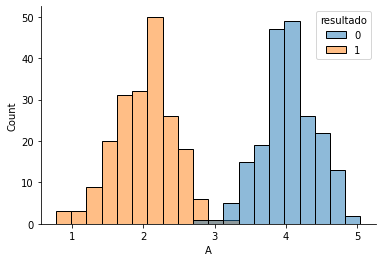

In [ ]:
sns.histplot(x = 'A', data = X, bins = 20, hue = 'resultado')
sns.despine()

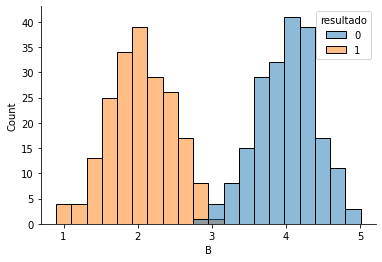

In [ ]:
sns.histplot(x = 'B', data = X, bins = 20, hue = 'resultado')
sns.despine()

In [ ]:
X.groupby('resultado').mean()

,A,B
resultado,,
0,4.038548,4.008855
1,2.020407,2.039446


In [ ]:
X.groupby('resultado').var()

,A,B
resultado,,
0,0.145665,0.159475
1,0.175217,0.184395


In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
K1 = X.query('resultado == 0')[['A', 'B']].cov()
K2 = X.query('resultado == 1')[['A', 'B']].cov()

mu1 = X.query('resultado == 0')[['A', 'B']].mean()
mu2 = X.query('resultado == 1')[['A', 'B']].mean()

In [ ]:
X['Probabilidade_1'] = X[['A', 'B']].apply(lambda x: multivariate_normal.pdf(x, mean=mu1, cov=K1) * prior_1, axis = 1)
X['Probabilidade_1'] = X['Probabilidade_1'] / X['Probabilidade_1'].sum()

X['Probabilidade_2'] = X[['A', 'B']].apply(lambda x: multivariate_normal.pdf(x, mean=mu2, cov=K2) * prior_2, axis = 1)
X['Probabilidade_2'] = X['Probabilidade_2'] / X['Probabilidade_2'].sum()

In [ ]:
X.head()

In [ ]:
X = np.arange(1, 5, 0.05)
Y = np.arange(1, 5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X)
Z2 = np.zeros_like(X)

for i, x in enumerate(np.arange(1, 5, 0.05)):
  for j, y in enumerate(np.arange(1, 5, 0.05)):
    Z[i,j] = multivariate_normal.pdf([x, y], mean=mu1, cov=K1) * prior_1
    Z2[i,j] = multivariate_normal.pdf([x, y], mean=mu2, cov=K2) * prior_2


In [ ]:
import plotly
import plotly.graph_objs as go

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale = 'Reds'), go.Surface(z=Z2, x=X, y=Y, colorscale = 'Blues')])
fig.show()


## Exemplo 2

In [ ]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

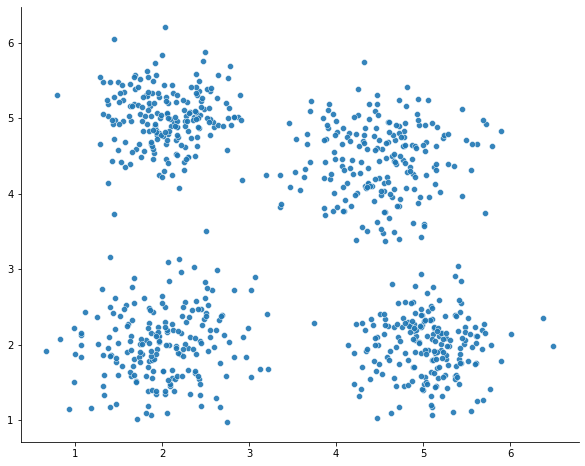

In [ ]:
num_examples = 200
classe1 = np.column_stack((np.random.normal(2, 0.4, num_examples), np.random.normal(2, 0.4, num_examples) + 3))
classe1 = np.row_stack((classe1, np.column_stack((np.random.normal(5, 0.4, num_examples), np.random.normal(5, 0.4, num_examples)- 3))))

classe2 = np.random.normal(2, 0.5, num_examples * 2).reshape(num_examples, 2)
classe2 = np.row_stack((classe2, np.random.normal(4.5, 0.5, num_examples * 2).reshape(num_examples, 2)))
X = np.row_stack((classe1, classe2))
y = np.array([1] * num_examples*2 + [-1] * num_examples*2)
fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], legend= None, alpha = 0.9)
sns.despine()


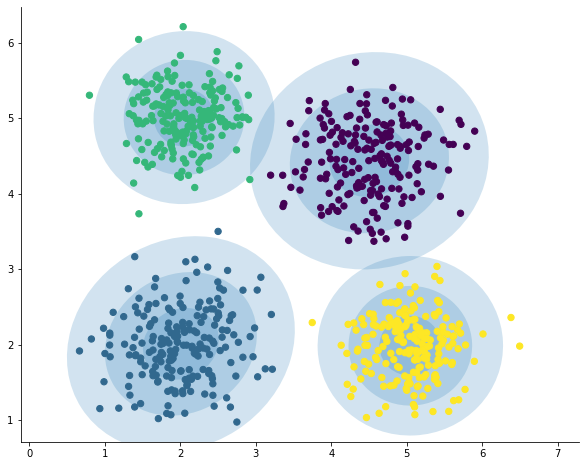

In [ ]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)
size = 50 * probs.max(1) ** 2  
fig = plt.figure(figsize=(10, 8))
plot_gmm(gmm, X)
sns.despine()

## Um exemplo um pouco mais complexo
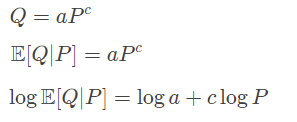

In [ ]:
import pymc3 as pm
import scipy

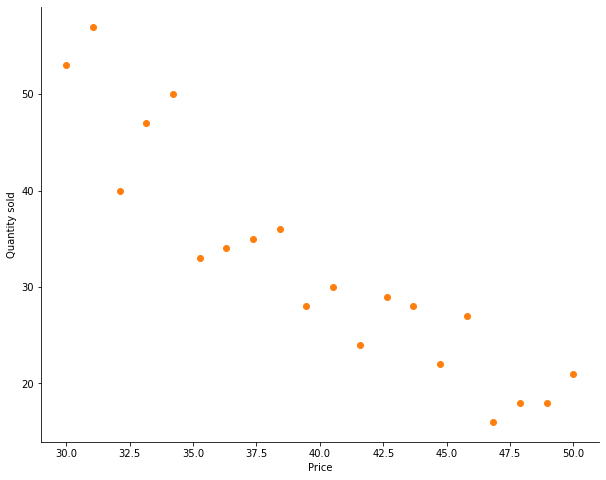

In [ ]:
np.random.seed(42)
a = 50000
k = 20
c = -2
p  = np.linspace(25,55)
p0 = np.linspace(30,50,20)
eq = a * p**c
q0 = np.random.poisson(a * p0**c)
π = eq * (p - k)
logp0mean = np.log(np.linspace(30, 50, 5)).mean()

# np.log(prices-k) + np.log(a) + c*np.log(prices)

#plt.plot(p,π);
fig = plt.figure(figsize=(10, 8))
plt.plot(p0,q0,'o',c='C1');
plt.xlabel('Price')
plt.ylabel('Quantity sold')
sns.despine()

In [ ]:
def fit(p0, q0):
  with pm.Model() as m:
      α = pm.Cauchy('α', 0, 5)
      β = pm.Cauchy('β', 0, 5)
      logμ0 = α + β * (np.log(p0) - logp0mean)
      μ0 = pm.Deterministic('μ0', np.exp(logμ0))
      qval = pm.Poisson('q0', μ0, observed=q0)
      t = pm.sample()
  return t

In [ ]:
t = fit(p0,q0)

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34583b7d50>,
      dtype=object)

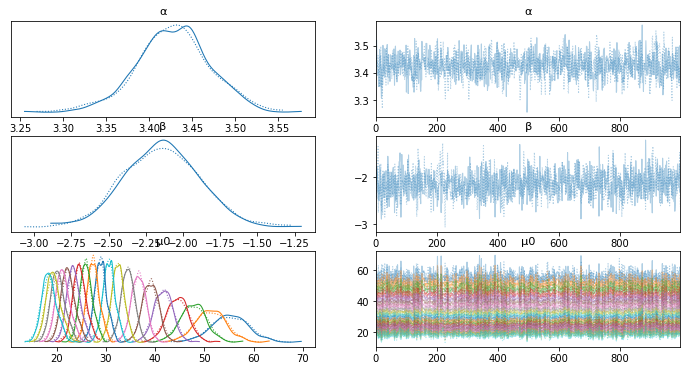

In [ ]:
pm.traceplot(t)

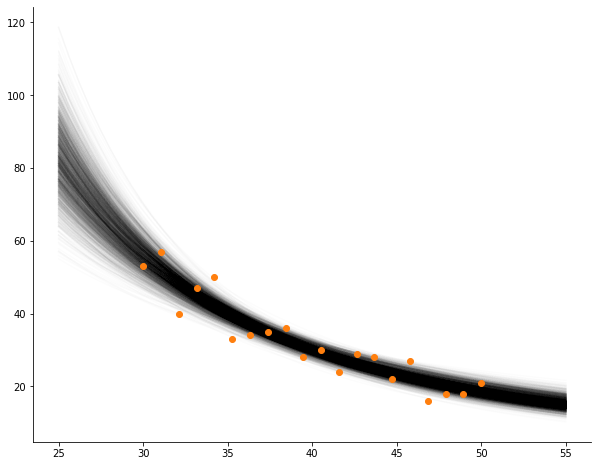

In [ ]:
p = np.linspace(25,55)
μ = np.exp(t.α + t.β * (np.log(p).reshape(-1,1) - np.log(p0).mean()))
fig = plt.figure(figsize=(10, 8))
plt.plot(p,μ,c='k',alpha=0.01);
plt.plot(p0,q0,'o',c='C1');
sns.despine()

In [ ]:
p = np.linspace(25,55)
def predict(t, p):
  p0 = np.linspace(30, 50, 5)
  μ = np.exp(t['α'].reshape(-1, 1) +
              np.outer(t['β'], np.log(p) - logp0mean))
  π = (p - k) * μ
  return μ.T, π.T
μ,π = predict(t,p)

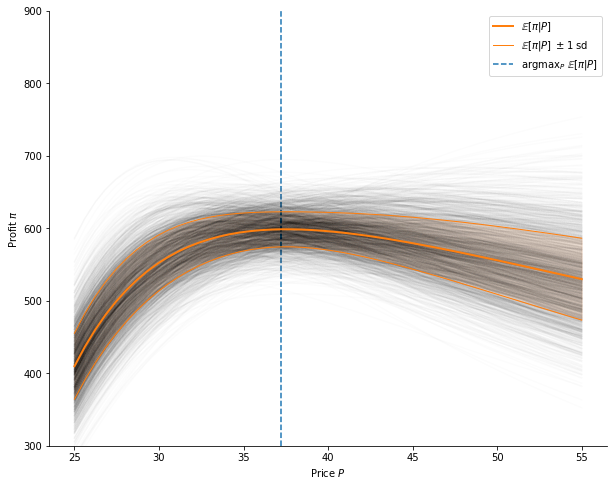

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.plot(p,π,c='k',alpha=0.01);
plt.plot(p,np.mean(π,1).T,c='C1',lw=2,label="$\mathbb{E}[\pi|P]$");
plt.fill_between(p,(np.mean(π,1)-np.std(π,1)).T,(np.mean(π,1)+np.std(π,1)).T,alpha=0.1,color='C1')
plt.plot(p,(np.mean(π,1)+np.std(π,1)).T,c='C1',lw=1,label="$\mathbb{E}[\pi|P]\ \pm$1 sd");
plt.plot(p,(np.mean(π,1)-np.std(π,1)).T,c='C1',lw=1);
pmax = p[np.argmax(np.mean(π,1))]
plt.vlines(pmax,300,900,colors='C0',linestyles='dashed',label="argmax$_P\ \mathbb{E}[\pi|P]$")
#plt.plot(p,(p - k) * eq)
plt.ylim(300,900);
plt.xlabel("Price $P$")
plt.ylabel("Profit $\pi$")

plt.legend()
sns.despine()

# Modelagem Causal

### Exemplo de Matching

In [ ]:
df = pd.read_csv('trainees.csv')


In [ ]:
df.head()

,unit,trainees,age,earnings
0,1,1,28,17700
1,2,1,34,10200
2,3,1,29,14400
3,4,1,25,20800
4,5,1,29,6100


In [ ]:
df.query("trainees==1")["earnings"].mean() - df.query("trainees==0")["earnings"].mean()

-4297.49373433584

In [ ]:
unique_on_age = (df
                 .query("trainees==0")
                 .drop_duplicates("age"))

matches = (df
           .query("trainees==1")
           .merge(unique_on_age, on="age", how="left", suffixes=("_t_1", "_t_0"))
           .assign(t1_minus_t0 = lambda d: d["earnings_t_1"] - d["earnings_t_0"]))

matches.head(7)

,unit_t_1,trainees_t_1,age,earnings_t_1,unit_t_0,trainees_t_0,earnings_t_0,t1_minus_t0
0,1,1,28,17700,27,0,8800,8900
1,2,1,34,10200,34,0,24200,-14000
2,3,1,29,14400,37,0,6200,8200
3,4,1,25,20800,35,0,23300,-2500
4,5,1,29,6100,37,0,6200,-100
5,6,1,23,28600,40,0,9500,19100
6,7,1,33,21900,29,0,15500,6400


In [ ]:
matches["t1_minus_t0"].mean()

2457.8947368421054

In [ ]:
med = pd.read_csv("medicine.csv")
med.head()

,sex,age,severity,medication,recovery
0,0,35.049134,0.887658,1,31
1,1,41.580323,0.899784,1,49
2,1,28.127491,0.486349,0,38
3,1,36.375033,0.323091,0,35
4,0,25.091717,0.209006,0,15


In [ ]:
med.query("medication==1")["recovery"].mean() - med.query("medication==0")["recovery"].mean()


16.895799546498726

In [ ]:
X = ["severity", "age", "sex"]
y = "recovery"

med = med.assign(**{f: (med[f] - med[f].mean())/med[f].std() for f in X})
med.head()

,sex,age,severity,medication,recovery
0,-0.996980,0.280787,1.459800,1,31
1,1.002979,0.865375,1.502164,1,49
2,1.002979,-0.338749,0.057796,0,38
3,1.002979,0.399465,-0.512557,0,35
4,-0.996980,-0.610473,-0.911125,0,15


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

treated = med.query("medication==1")
untreated = med.query("medication==0")

mt0 = KNeighborsRegressor(n_neighbors=1).fit(untreated[X], untreated[y])
mt1 = KNeighborsRegressor(n_neighbors=1).fit(treated[X], treated[y])

predicted = pd.concat([
    treated.assign(match=mt0.predict(treated[X])),
    
    untreated.assign(match=mt1.predict(untreated[X]))
])

predicted.head()

,sex,age,severity,medication,recovery,match
0,-0.996980,0.280787,1.459800,1,31,39.0
1,1.002979,0.865375,1.502164,1,49,52.0
7,-0.996980,1.495134,1.268540,1,38,46.0
10,1.002979,-0.106534,0.545911,1,34,45.0
16,-0.996980,0.043034,1.428732,1,30,39.0


$$\frac{1}{N} \sum^N_{i=0} (2T_i - 1)\big(Y_i - Y_{jm}(i)\big)$$

In [ ]:
np.mean((2*predicted["medication"] - 1)*(predicted["recovery"] - predicted["match"]))

-0.9954